In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=96cb6b1cbbdd94b3d882405521a9178d5cdeb07aedcef5b324e89da04c0952d8
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
import yfinance as yf

In [7]:
microsoft= yf.Ticker('MSFT')
msft= microsoft.history(period='1y')


In [8]:
print(msft)

                  Open        High  ...  Dividends  Stock Splits
Date                                ...                         
2020-07-31  202.439855  203.133155  ...        0.0             0
2020-08-03  209.491591  215.552897  ...        0.0             0
2020-08-04  212.116164  212.710416  ...        0.0             0
2020-08-05  212.839160  212.938207  ...        0.0             0
2020-08-06  210.303714  214.295066  ...        0.0             0
...                ...         ...  ...        ...           ...
2021-07-26  289.000000  289.690002  ...        0.0             0
2021-07-27  289.429993  289.579987  ...        0.0             0
2021-07-28  288.989990  290.149994  ...        0.0             0
2021-07-29  286.239990  288.619995  ...        0.0             0
2021-07-30  285.170013  286.660004  ...        0.0             0

[252 rows x 7 columns]


In [9]:
msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.00000,252.0
mean,232.799210,235.077547,230.637279,232.974624,2.885080e+07,0.00869,0.0
std,23.231251,23.035832,23.487486,23.411150,9.550066e+06,0.06862,0.0
min,195.771101,201.251386,194.837865,198.948074,1.055060e+07,0.00000,0.0
25%,212.927200,214.768419,211.212222,213.135715,2.283545e+07,0.00000,0.0
50%,229.769443,232.937128,227.045730,229.901237,2.627630e+07,0.00000,0.0
75%,250.058010,251.337494,247.509995,249.413208,3.306872e+07,0.00000,0.0
max,289.429993,290.149994,286.640015,289.670013,7.898300e+07,0.56000,0.0


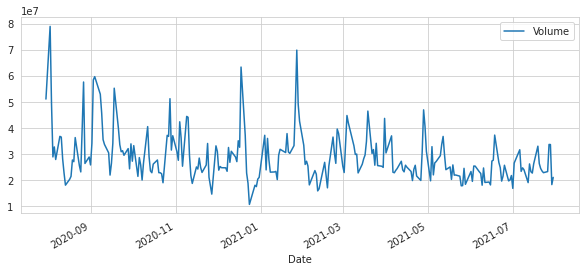

In [10]:
msft['Volume'].plot(legend=True, figsize=(10,4))

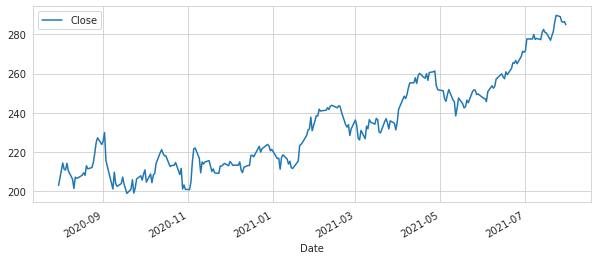

In [11]:
msft['Close'].plot(legend=True,figsize=(10,4))

In [12]:
ma_day=[10,20,50]

In [13]:
for ma in ma_day:
  column_name='MA for %s days'%(str(ma))
  msft[column_name]=msft['Close'].rolling(ma).mean()

In [14]:
print(msft)

                  Open        High  ...  MA for 20 days  MA for 50 days
Date                                ...                                
2020-07-31  202.439855  203.133155  ...             NaN             NaN
2020-08-03  209.491591  215.552897  ...             NaN             NaN
2020-08-04  212.116164  212.710416  ...             NaN             NaN
2020-08-05  212.839160  212.938207  ...             NaN             NaN
2020-08-06  210.303714  214.295066  ...             NaN             NaN
...                ...         ...  ...             ...             ...
2021-07-26  289.000000  289.690002  ...      278.920003      263.764870
2021-07-27  289.429993  289.579987  ...      279.811003      264.544104
2021-07-28  288.989990  290.149994  ...      280.552003      265.376201
2021-07-29  286.239990  288.619995  ...      281.332004      266.255801
2021-07-30  285.170013  286.660004  ...      281.997504      267.091601

[252 rows x 10 columns]


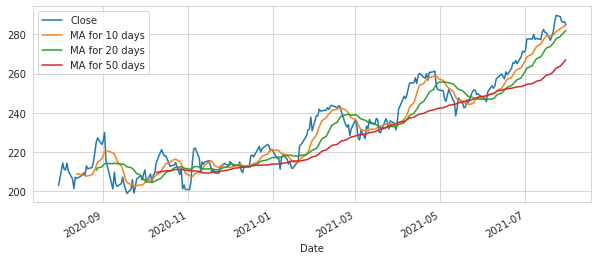

In [15]:
msft[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [16]:
msft['Daily Return']= msft['Close'].pct_change()

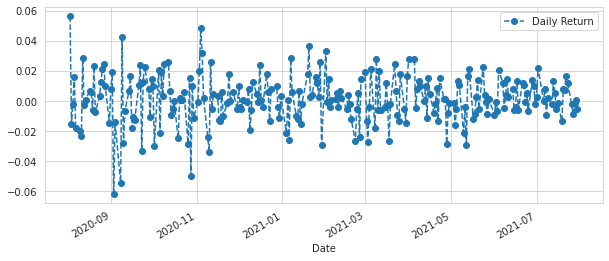

In [17]:
msft['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


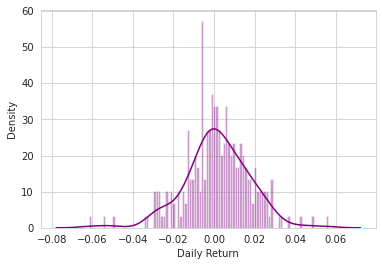

In [18]:
sns.distplot(msft['Daily Return'].dropna(), bins=100, color='purple')

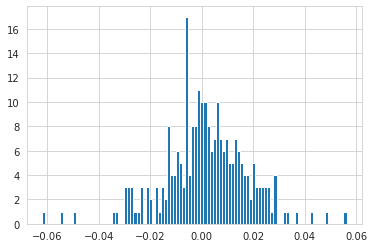

In [19]:
msft['Daily Return'].hist(bins=100)

In [20]:
tech_list=['MSFT','AMZN','GOOG']
closing_df=yf.download(tech_list, start='2020-07-12', end='2021-07-12')['Close']

[*********************100%***********************]  3 of 3 completed


In [21]:
closing_df.head()

,AMZN,GOOG,MSFT
Date,,,
2020-07-13,3104.000000,1511.339966,207.070007
2020-07-14,3084.000000,1520.579956,208.350006
2020-07-15,3008.870117,1513.640015,208.039993
2020-07-16,2999.899902,1518.000000,203.919998
2020-07-17,2961.969971,1515.550049,202.880005


In [22]:
tech_rets=closing_df.pct_change()

In [23]:
tech_rets.head()

,AMZN,GOOG,MSFT
Date,,,
2020-07-13,NaN,NaN,NaN
2020-07-14,-0.006443,0.006114,0.006181
2020-07-15,-0.024361,-0.004564,-0.001488
2020-07-16,-0.002981,0.002880,-0.019804
2020-07-17,-0.012644,-0.001614,-0.005100


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


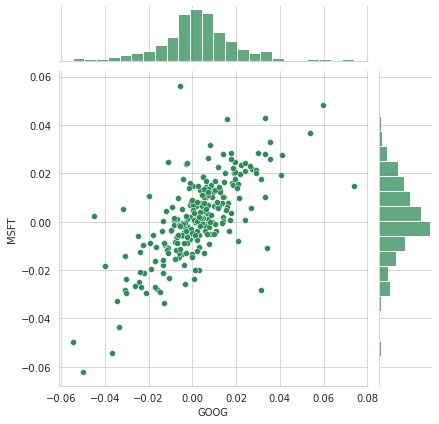

In [24]:
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter',color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


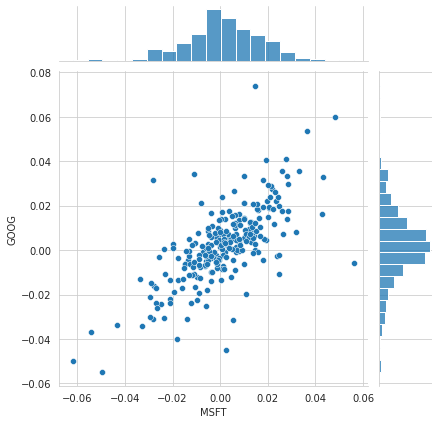

In [25]:
sns.jointplot('MSFT','GOOG',tech_rets,kind='scatter')

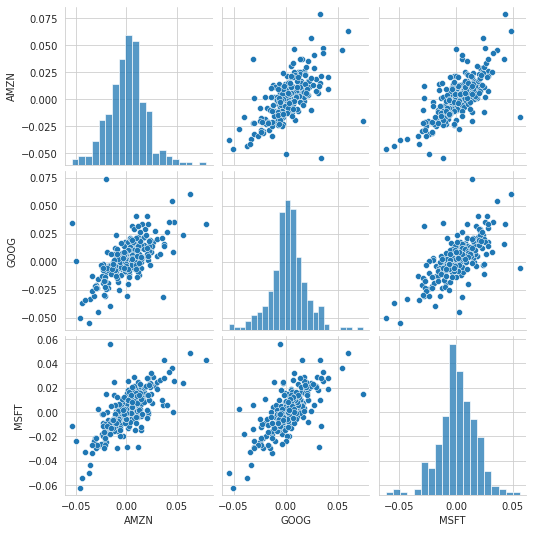

In [26]:
sns.pairplot(tech_rets.dropna())

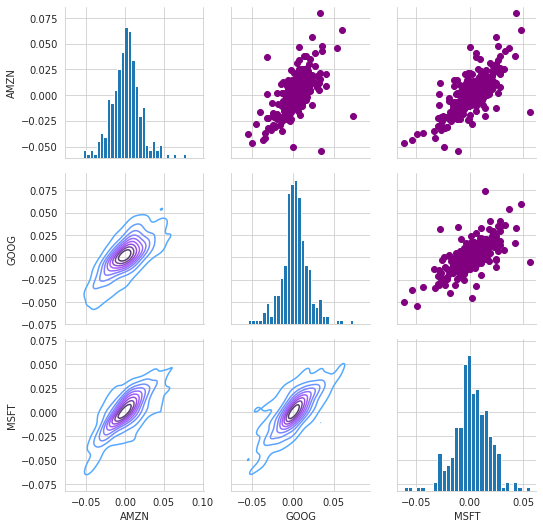

In [27]:
returns_fig= sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

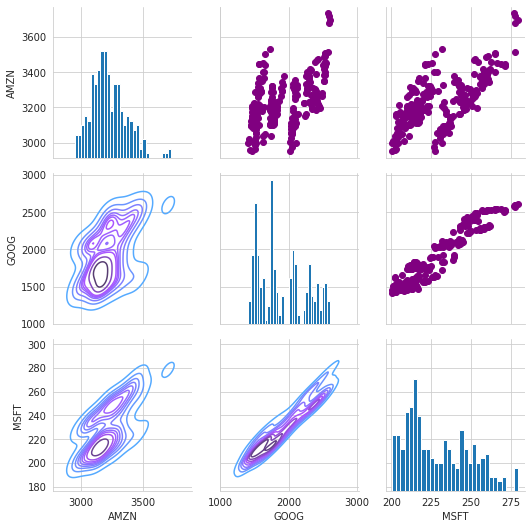

In [28]:
returns_fig= sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

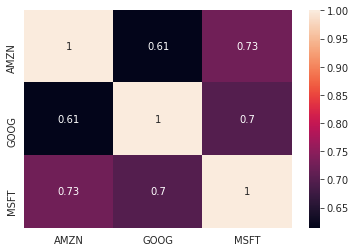

In [29]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

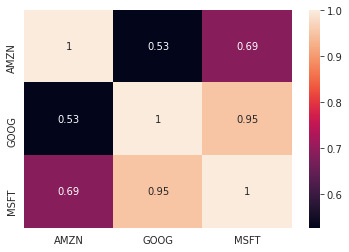

In [30]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [31]:
rets=tech_rets.dropna()

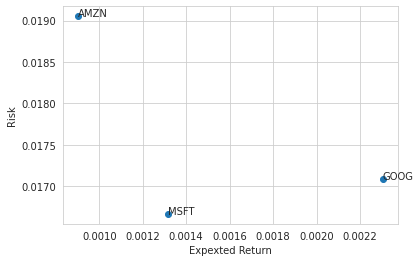

In [32]:
plt.scatter(rets.mean(),rets.std(),label=True)
plt.xlabel('Expexted Return')
plt.ylabel('Risk')
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
  plt.annotate(label,xy=(x,y))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


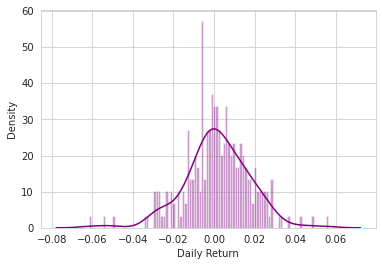

In [33]:
sns.distplot(msft['Daily Return'].dropna(),bins=100,color='purple')

In [34]:
rets.head()

,AMZN,GOOG,MSFT
Date,,,
2020-07-14,-0.006443,0.006114,0.006181
2020-07-15,-0.024361,-0.004564,-0.001488
2020-07-16,-0.002981,0.002880,-0.019804
2020-07-17,-0.012644,-0.001614,-0.005100
2020-07-20,0.079295,0.033103,0.042981


In [35]:
rets['MSFT'].quantile(0.05) #VAR or there is 95% confidence that the maximum loss on the stock returns will be 2.69%

-0.026903190134496057

In [36]:
#Performing Monte Carlo Simulations using Geometric Brownian Motion 

In [37]:
# the equation of geometric brownian motion is del(S)=S[avg.del(t) + sd.(del(t))^1/2]

In [38]:
days=365
dt=1/365
mu=rets.mean()['MSFT']
sigma=rets.std()['MSFT']

In [39]:
def stock_monte_carlo(start_price,days,mu,sigma):
  price=np.zeros(days)
  price[0]=start_price
 
  shock=np.zeros(days)
  drift=np.zeros(days)
  
  for x in range(1,days):
    shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
    drift[x]=mu*dt
    price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
 
  return price

In [40]:
msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2020-07-31,202.439855,203.133155,197.101545,203.044006,51044000,0.0,0,NaN,NaN,NaN,NaN
2020-08-03,209.491591,215.552897,208.421946,214.463440,78983000,0.0,0,NaN,NaN,NaN,0.056241
2020-08-04,212.116164,212.710416,208.293180,211.244598,49280100,0.0,0,NaN,NaN,NaN,-0.015009
2020-08-05,212.839160,212.938207,209.541107,210.897964,28806400,0.0,0,NaN,NaN,NaN,-0.001641
2020-08-06,210.303714,214.295066,209.521296,214.275269,32656800,0.0,0,NaN,NaN,NaN,0.016014


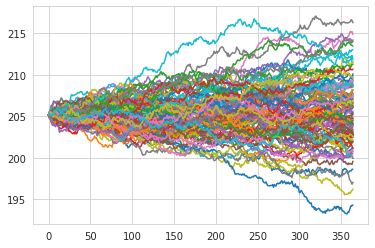

In [41]:
start_price=205.203104
 
for run in range(100):
  plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
 
plt.xlabel='Days'
plt.ylabel='Price'
plt.title='Monte Carlo Analysis for Microsoft'

In [42]:
runs=10000
 
simulations=np.zeros(runs)
 
for run in range(runs):
  simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [43]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)
#Mean ending price
plt.figtext(0.6,0.7, "Mean final price:$%.2f"%simulations.mean())
#variance of the price(within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f"%(start_price-q,))
#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99):$%.2f"%q)
#plot a line at 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
#Title
plt.title=Final price distribution for Microsoft stock after %s days" % days, weight='bold'

SyntaxError: ignored